In [1]:
#include <TChain.h>
#include <vector>
#include <TFile.h>
#include <iostream>
#include <string>
#include <stdio.h>

In [2]:
//Solo se usa un archivo root, pero hay 4 que se pueden usar con TChain.
TFile *file = TFile::Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/Data/data_A.exactly2lep.root");

In [3]:
TTree *tree = (TTree*) file->Get("mini");
int nentries = tree->GetEntries();
cout << nentries << endl;

664613


In [4]:
vector<float>   *lepton_pt;  //transverse momentum of the lepton
vector<float>   *lepton_eta = 0;  //pseudorapidity of the lepton
vector<float>   *lepton_phi = 0;  //azimuthal angle of the lepton
vector<float>   *lepton_E   = 0;  //energy of the lepton

In [5]:
tree->SetBranchAddress("lep_pt",        &lepton_pt);    
tree->SetBranchAddress("lep_eta",       &lepton_eta);
tree->SetBranchAddress("lep_phi",       &lepton_phi);
tree->SetBranchAddress("lep_E",         &lepton_E);

In [6]:
TCanvas *canvas = new TCanvas();
TH1F *hist = new TH1F("Z_{ll}_invmass","Finding the Z boson ; Invariant Mass m_{ll} [GeV] ; Events",15,35,110);
TGraphErrors *graph = new TGraphErrors(); 

In [7]:
float calc_mll(vector<float> lep_pt, vector<float> lep_eta, vector<float> lep_phi, vector<float> lep_E)
{
    // 0th lepton is [0], next lepton is [1] etc
    // get the energy of 0th lepton by lep_E[0]

    float sumE = 0, px_0 = 0, px_1 = 0, py_0 = 0, py_1 = 0, pz_0 = 0, pz_1 = 0; 
    
    sumE = lep_E[0] + lep_E[1];
    
    px_0 = lep_pt[0]*TMath::Cos(lep_phi[0]); // x-momentum of 0th lepton
    px_1 = lep_pt[1]*TMath::Cos(lep_phi[1]); // x-momentum of 1st lepton
    py_0 = lep_pt[0]*TMath::Sin(lep_phi[0]); // y-momentum of 0th lepton
    py_1 = lep_pt[1]*TMath::Sin(lep_phi[1]); // y-momentum of 1st lepton
    pz_0 = lep_pt[0]*TMath::SinH(lep_eta[0]); // z-momentum of 0th lepton
    pz_1 = lep_pt[1]*TMath::SinH(lep_eta[1]); // z-momentum of 1st lepton
    
    float sumpx = 0, sumpy = 0, sumpz = 0, sump = 0;
    
    sumpx = px_0 + px_1; // sumpx = sum of x-momenta
    sumpy = py_0 + py_1; // sumpy = sum of y-momenta
    sumpz = pz_0 + pz_1; // sumpz = pz_0 + pz_1
    sump = TMath::Sqrt(sumpx*sumpx + sumpy*sumpy + sumpz*sumpz); //sump = magnitude of total momentum vector. Remember it's a vector!
    
    float Mll = TMath::Sqrt(sumE*sumE - sump*sump)/1000.0; //divide by 1000 to go from MeV to GeV
    
    return Mll;
}

In [8]:
float fraction = 0.001;
float events_to_run = nentries*fraction;

for (int ii=0; ii<events_to_run; ii++)
{
    tree->GetEntry(ii);
    float Mll = calc_mll(*lepton_pt, *lepton_eta, *lepton_phi, *lepton_E);
    hist->Fill(Mll);
}

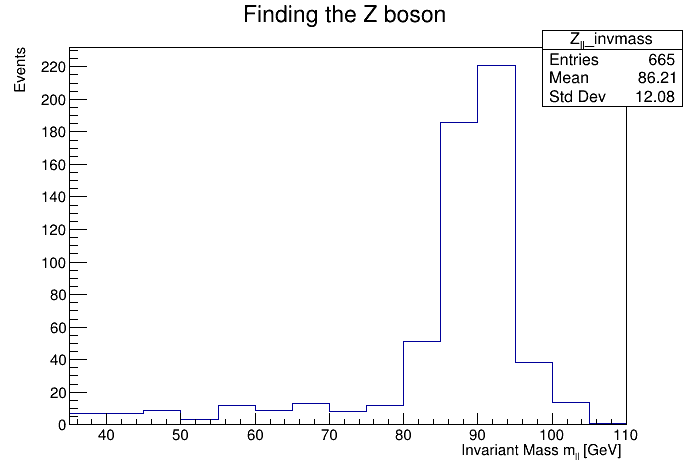

In [9]:
hist->Draw();
canvas->Draw();

In [10]:
float x = 37.5; // x center of the first bin
int npoint = 1; // First point of the graph
while (x < 110) // 110 is the maximum value of the X axis
{
    int bin = hist->FindBin(x); //Find the bin in which x should be
    float y = hist->GetBinContent(bin); //Give the number of events in the bin determined by the x value
    // statistical error on the data
    float ex = 0.0; // No error on x values
    float ey = TMath::Sqrt(y);
    graph->SetPoint(npoint, x, y);
    graph->SetPointError(npoint, ex, ey); // No errors in x values, only in the y values.
    x += 5; // x values go between the middle point of each bin until reach the last one (107.5)
    npoint += 1;
}

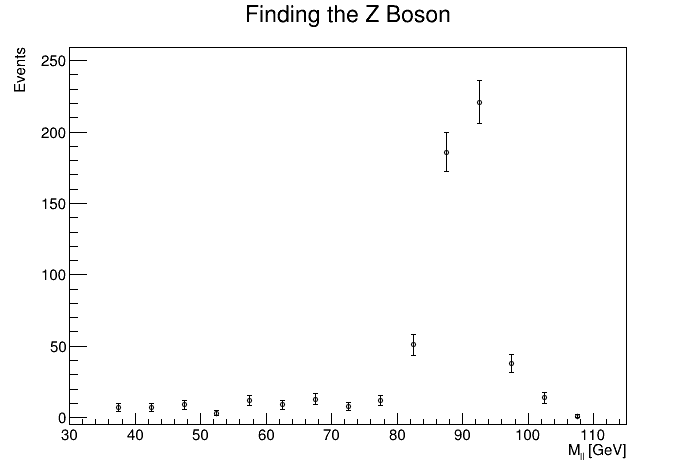

In [11]:
// Title graph
graph->SetTitle("Finding the Z Boson");

// x-axis label
graph->GetXaxis()->SetTitle("M_{ll} [GeV]");

// y-axis label
graph->GetYaxis()->SetTitle("Events");

// x-axis range
//graph->GetXaxis()->SetRangeUser(30, 115);

// y-axis range
//graph->SetMinimum(0);

//graph->SetMarkerSize(1);

//graph->Draw("AP");
//canvas->SetLogy();

// x-axis range
graph->GetXaxis()->SetLimits(30, 115);

// y-axis range
graph->SetMinimum(-5);
graph->SetMarkerStyle(4);
graph->SetMarkerSize(0.5);
graph->Draw("AP");
canvas->Draw();